In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\DanFennell\OneDrive - Fennells\Documents 1\Projects\Olympics\summer.csv")

In [3]:
df.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Country,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Hungary,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Austria,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Greece,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Greece,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Greece,Men,100m freestyle for sailors,M,Silver


In [4]:
# Check info, no missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29216 entries, 0 to 29215
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   City          29216 non-null  object
 1   Edition       29216 non-null  int64 
 2   Sport         29216 non-null  object
 3   Discipline    29216 non-null  object
 4   Athlete       29216 non-null  object
 5   NOC           29216 non-null  object
 6   Country       29216 non-null  object
 7   Gender        29216 non-null  object
 8   Event         29216 non-null  object
 9   Event_gender  29216 non-null  object
 10  Medal         29216 non-null  object
dtypes: int64(1), object(10)
memory usage: 2.5+ MB


In [5]:
# Find any duplicates
df[df.duplicated()]

,City,Edition,Sport,Discipline,Athlete,NOC,Country,Gender,Event,Event_gender,Medal
16099,Moscow,1980,Hockey,Hockey,"SINGH, Singh",IND,India,Men,hockey,M,Gold


In [6]:
# I found that there are 2 values for Singh, possibly an input error
df.loc[df["Athlete"] == "SINGH, Singh"]

,City,Edition,Sport,Discipline,Athlete,NOC,Country,Gender,Event,Event_gender,Medal
16098,Moscow,1980,Hockey,Hockey,"SINGH, Singh",IND,India,Men,hockey,M,Gold
16099,Moscow,1980,Hockey,Hockey,"SINGH, Singh",IND,India,Men,hockey,M,Gold


In [7]:
# Locate the whole team who won the gold medal in Hockey in 1980 to comapre to my research
df.loc[(df["Edition"] == 1980) & (df["Event"] == "hockey") & (df["Country"] == "India")]

,City,Edition,Sport,Discipline,Athlete,NOC,Country,Gender,Event,Event_gender,Medal
16087,Moscow,1980,Hockey,Hockey,"ALLAN, Schofield",IND,India,Men,hockey,M,Gold
16088,Moscow,1980,Hockey,Hockey,"AMARJIT RANA, Singh",IND,India,Men,hockey,M,Gold
16089,Moscow,1980,Hockey,Hockey,"BASKARAN, Baskaran",IND,India,Men,hockey,M,Gold
16090,Moscow,1980,Hockey,Hockey,"CHETTRI, Chettri",IND,India,Men,hockey,M,Gold
16091,Moscow,1980,Hockey,Hockey,"DEAVINDER, Singh",IND,India,Men,hockey,M,Gold
16092,Moscow,1980,Hockey,Hockey,"FERNANDES, Mervyn",IND,India,Men,hockey,M,Gold
16093,Moscow,1980,Hockey,Hockey,"GURMAIL, Singh",IND,India,Men,hockey,M,Gold
16094,Moscow,1980,Hockey,Hockey,"KAUSHIK, Maharaj Krishon",IND,India,Men,hockey,M,Gold
16095,Moscow,1980,Hockey,Hockey,"KUMAR, Charanjit",IND,India,Men,hockey,M,Gold
16096,Moscow,1980,Hockey,Hockey,"MANEYPANDA, Somaya",IND,India,Men,hockey,M,Gold


After some research I found this information was actually correct and this is not a duplicate entry. There were 16 members of the team and 2 of them shared the same name.

In [8]:
# Change the Edition column to year for easier reading
df = df.rename(columns = {"Edition":"Year"})

In [9]:
df.head()

,City,Year,Sport,Discipline,Athlete,NOC,Country,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Hungary,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Austria,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Greece,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Greece,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Greece,Men,100m freestyle for sailors,M,Silver


In [10]:
# Split the athelte name column into two seperate columns, First name and last name
df[["Last_name", "First_name"]] = df["Athlete"].str.split(",", n = 1, expand = True)

In [11]:
df

,City,Year,Sport,Discipline,Athlete,NOC,Country,Gender,Event,Event_gender,Medal,Last_name,First_name
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Hungary,Men,100m freestyle,M,Gold,HAJOS,Alfred
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Austria,Men,100m freestyle,M,Silver,HERSCHMANN,Otto
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Greece,Men,100m freestyle for sailors,M,Bronze,DRIVAS,Dimitrios
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Greece,Men,100m freestyle for sailors,M,Gold,MALOKINIS,Ioannis
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Greece,Men,100m freestyle for sailors,M,Silver,CHASAPIS,Spiridon
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29211,Beijing,2008,Wrestling,Wrestling Gre-R,"ENGLICH, Mirko",GER,Germany,Men,84 - 96kg,M,Silver,ENGLICH,Mirko
29212,Beijing,2008,Wrestling,Wrestling Gre-R,"MIZGAITIS, Mindaugas",LTU,Lithuania,Men,96 - 120kg,M,Bronze,MIZGAITIS,Mindaugas
29213,Beijing,2008,Wrestling,Wrestling Gre-R,"PATRIKEEV, Yuri",ARM,Armenia,Men,96 - 120kg,M,Bronze,PATRIKEEV,Yuri
29214,Beijing,2008,Wrestling,Wrestling Gre-R,"LOPEZ, Mijain",CUB,Cuba,Men,96 - 120kg,M,Gold,LOPEZ,Mijain


In [12]:
# Now we can drop the athlete column
df.drop(columns = "Athlete", inplace = True)

In [13]:
df.head()

,City,Year,Sport,Discipline,NOC,Country,Gender,Event,Event_gender,Medal,Last_name,First_name
0,Athens,1896,Aquatics,Swimming,HUN,Hungary,Men,100m freestyle,M,Gold,HAJOS,Alfred
1,Athens,1896,Aquatics,Swimming,AUT,Austria,Men,100m freestyle,M,Silver,HERSCHMANN,Otto
2,Athens,1896,Aquatics,Swimming,GRE,Greece,Men,100m freestyle for sailors,M,Bronze,DRIVAS,Dimitrios
3,Athens,1896,Aquatics,Swimming,GRE,Greece,Men,100m freestyle for sailors,M,Gold,MALOKINIS,Ioannis
4,Athens,1896,Aquatics,Swimming,GRE,Greece,Men,100m freestyle for sailors,M,Silver,CHASAPIS,Spiridon


In [14]:
# Change the last name from upper the title case
df["Last_name"] = df["Last_name"].str.title()
df.head()

,City,Year,Sport,Discipline,NOC,Country,Gender,Event,Event_gender,Medal,Last_name,First_name
0,Athens,1896,Aquatics,Swimming,HUN,Hungary,Men,100m freestyle,M,Gold,Hajos,Alfred
1,Athens,1896,Aquatics,Swimming,AUT,Austria,Men,100m freestyle,M,Silver,Herschmann,Otto
2,Athens,1896,Aquatics,Swimming,GRE,Greece,Men,100m freestyle for sailors,M,Bronze,Drivas,Dimitrios
3,Athens,1896,Aquatics,Swimming,GRE,Greece,Men,100m freestyle for sailors,M,Gold,Malokinis,Ioannis
4,Athens,1896,Aquatics,Swimming,GRE,Greece,Men,100m freestyle for sailors,M,Silver,Chasapis,Spiridon


In [15]:
# Checking Country names to make sure there are no errors such as USA instead of United States
df.Country.value_counts()

Country
United States     4335
Germany           2791
Soviet Union      2049
United Kingdom    1594
France            1314
                  ... 
Burundi              1
Cote d'Ivoire        1
Senegal              1
Djibouti             1
Afghanistan          1
Name: count, Length: 130, dtype: int64

In [16]:
# Find the total medals by country
df.groupby("Country")["Medal"].count().sort_values(ascending=False)

Country
United States     4335
Germany           2791
Soviet Union      2049
United Kingdom    1594
France            1314
                  ... 
Cote d'Ivoire        1
Burundi              1
Bermuda*             1
Barbados             1
Macedonia            1
Name: Medal, Length: 130, dtype: int64

In [17]:
# Find just the top 10 Countries by Medals
top_10 = df.groupby("Country")["Medal"].count().sort_values(ascending=False).head(10)

In [18]:
top_10

Country
United States     4335
Germany           2791
Soviet Union      2049
United Kingdom    1594
France            1314
Italy             1228
Australia         1075
Hungary           1053
Sweden            1021
Russia             861
Name: Medal, dtype: int64

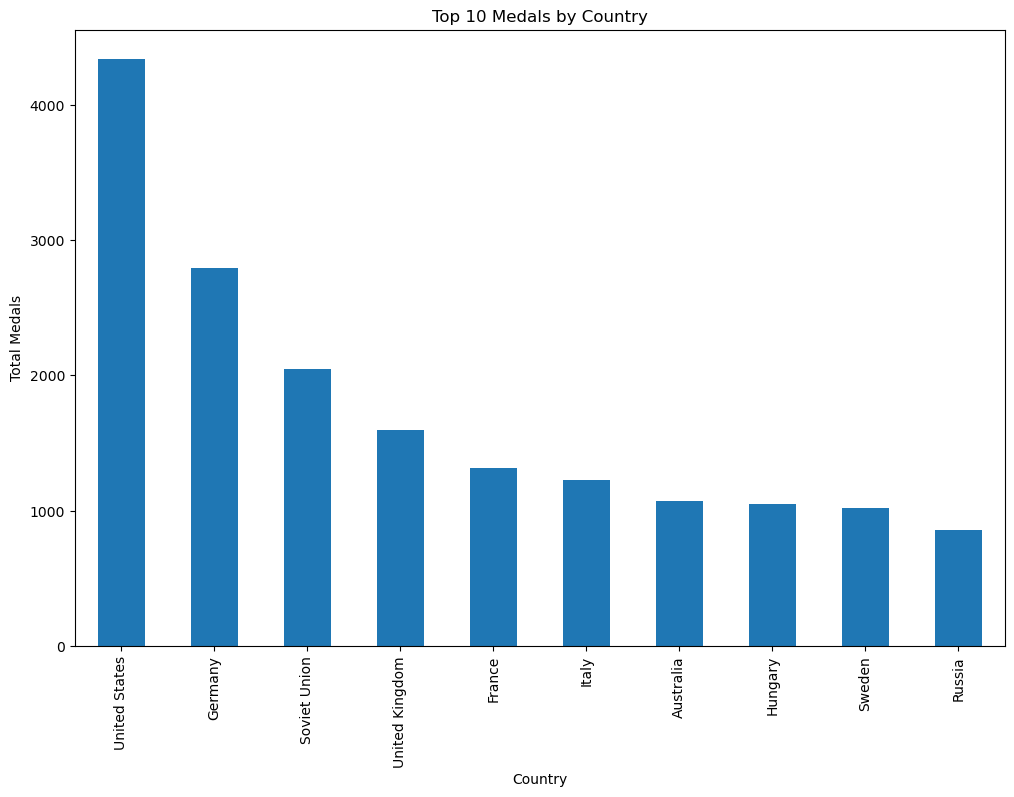

In [19]:
plt.figure(figsize=(12,8))
top_10.plot(kind="bar")
plt.title("Top 10 Medals by Country")
plt.ylabel("Total Medals")
plt.show()

In [20]:
# Filter the dataframe just for the top 10 countries
df_10 = df[df.Country.isin(top_10.index)]
df_10

,City,Year,Sport,Discipline,NOC,Country,Gender,Event,Event_gender,Medal,Last_name,First_name
0,Athens,1896,Aquatics,Swimming,HUN,Hungary,Men,100m freestyle,M,Gold,Hajos,Alfred
6,Athens,1896,Aquatics,Swimming,HUN,Hungary,Men,1200m freestyle,M,Gold,Hajos,Alfred
11,Athens,1896,Athletics,Athletics,USA,United States,Men,100m,M,Bronze,Lane,Francis
12,Athens,1896,Athletics,Athletics,HUN,Hungary,Men,100m,M,Bronze,Szokolyi,Alajos
13,Athens,1896,Athletics,Athletics,USA,United States,Men,100m,M,Gold,Burke,Thomas
...,...,...,...,...,...,...,...,...,...,...,...,...
29207,Beijing,2008,Wrestling,Wrestling Gre-R,HUN,Hungary,Men,74 - 84kg,M,Silver,Fodor,Zoltan
29209,Beijing,2008,Wrestling,Wrestling Gre-R,USA,United States,Men,84 - 96kg,M,Bronze,Wheeler,Adam
29210,Beijing,2008,Wrestling,Wrestling Gre-R,RUS,Russia,Men,84 - 96kg,M,Gold,Khushtov,Aslanbek
29211,Beijing,2008,Wrestling,Wrestling Gre-R,GER,Germany,Men,84 - 96kg,M,Silver,Englich,Mirko


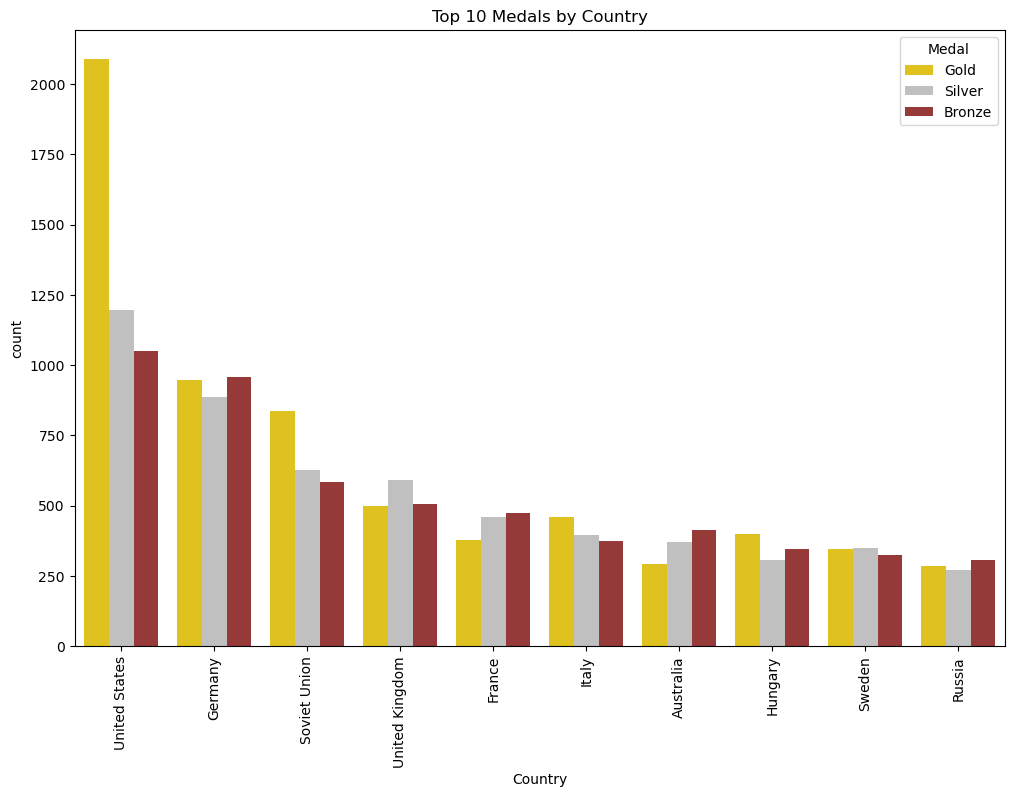

In [21]:
# show medals per country split into the different medal categories
plt.figure(figsize = (12, 8))
sns.countplot(data=df_10, x = "Country", hue = "Medal", order=top_10.index,
           hue_order=["Gold", "Silver", "Bronze"], palette=["gold", "silver", "brown"])
plt.title("Top 10 Medals by Country")
plt.xticks(rotation=90)
plt.show()

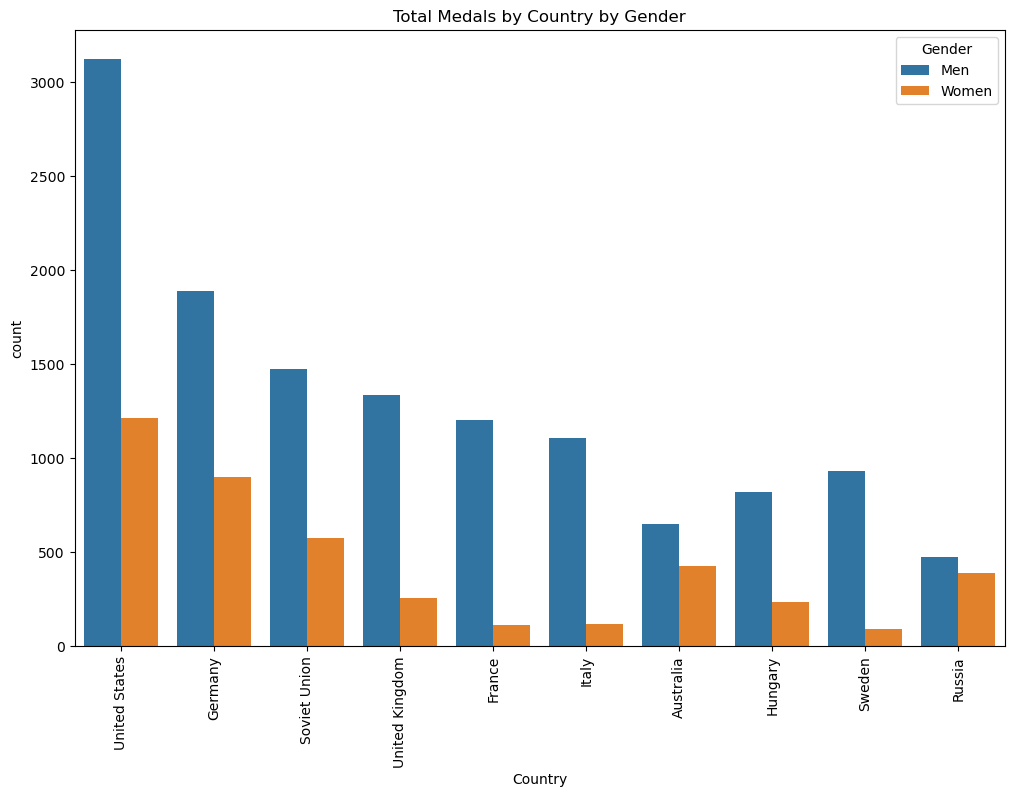

In [22]:
# Show Total medals by Gender
plt.figure(figsize=(12,8))
sns.countplot(data=df_10, x="Country", hue="Gender", order=top_10.index)
plt.title("Total Medals by Country by Gender")
plt.xticks(rotation=90)
plt.show()

# As the United States is the most successful country I would like to focus on them and their performance.

In [24]:
# Focus on the USA
df_usa = df.loc[df["Country"] == "United States"]

In [25]:
# Find the total medals by sport
df_usa.groupby(["Country", "Sport"])["Medal"].count().sort_values(ascending=False)

Country        Sport            
United States  Aquatics             1096
               Athletics             952
               Rowing                347
               Basketball            294
               Shooting              186
               Gymnastics            168
               Sailing               139
               Wrestling             125
               Equestrian            121
               Football              114
               Boxing                109
               Volleyball             98
               Baseball               68
               Softball               60
               Cycling                59
               Archery                52
               Fencing                48
               Tennis                 47
               Rugby                  46
               Weightlifting          43
               Hockey                 28
               Golf                   27
               Canoe / Kayak          21
               Modern Pe

In [26]:
# Get top 20 sports
usa_top20 = df_usa.groupby("Sport")["Medal"].count().sort_values(ascending=False).head(20)
usa_top20

Sport
Aquatics         1096
Athletics         952
Rowing            347
Basketball        294
Shooting          186
Gymnastics        168
Sailing           139
Wrestling         125
Equestrian        121
Football          114
Boxing            109
Volleyball         98
Baseball           68
Softball           60
Cycling            59
Archery            52
Fencing            48
Tennis             47
Rugby              46
Weightlifting      43
Name: Medal, dtype: int64

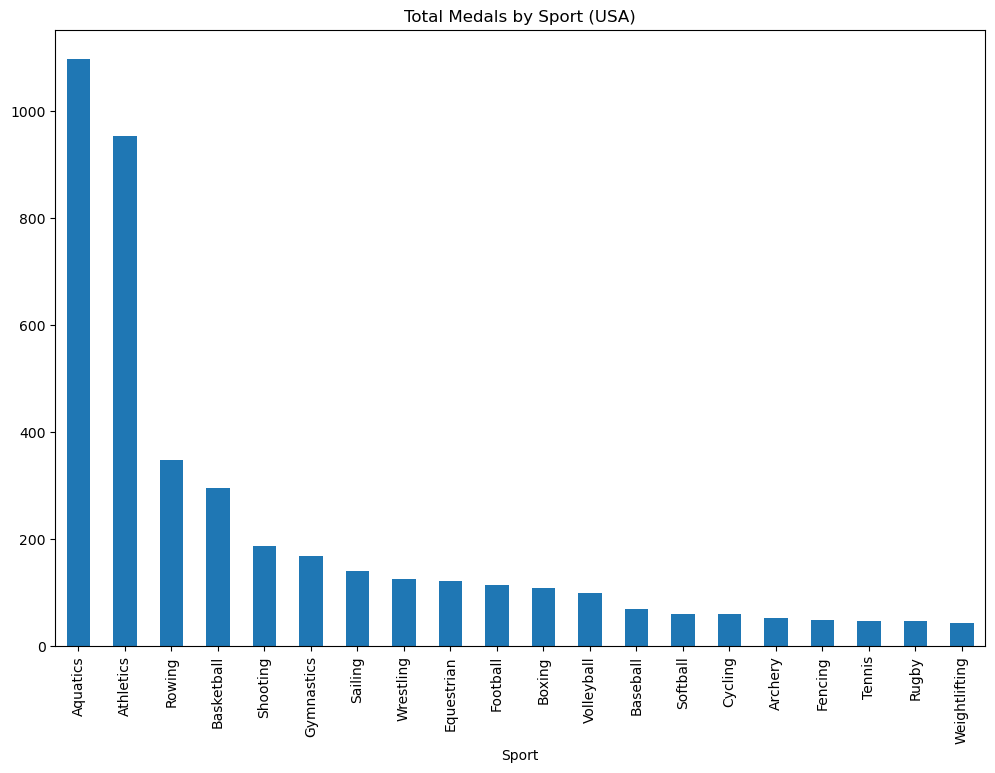

In [27]:
plt.figure(figsize=(12,8))
usa_top20.plot(kind="bar", x="Sport")
plt.title("Total Medals by Sport (USA)")
plt.show()

We can see that Aquatics and Athletics are by far the most successful sports for The United States

In [28]:
# Filter usa_df for USA top 10
df_usa_top20 = df_usa[df_usa.Sport.isin(usa_top20.index)]
df_usa_top20                

,City,Year,Sport,Discipline,NOC,Country,Gender,Event,Event_gender,Medal,Last_name,First_name
11,Athens,1896,Athletics,Athletics,USA,United States,Men,100m,M,Bronze,Lane,Francis
13,Athens,1896,Athletics,Athletics,USA,United States,Men,100m,M,Gold,Burke,Thomas
15,Athens,1896,Athletics,Athletics,USA,United States,Men,110m hurdles,M,Gold,Curtis,Thomas
19,Athens,1896,Athletics,Athletics,USA,United States,Men,1500m,M,Silver,Blake,Arthur
21,Athens,1896,Athletics,Athletics,USA,United States,Men,400m,M,Gold,Burke,Thomas
...,...,...,...,...,...,...,...,...,...,...,...,...
29098,Beijing,2008,Volleyball,Volleyball,USA,United States,Women,volleyball,W,Silver,Tom,Logan
29099,Beijing,2008,Volleyball,Volleyball,USA,United States,Women,volleyball,W,Silver,Willoughby,Kim
29151,Beijing,2008,Wrestling,Wrestling Free.,USA,United States,Men,- 55kg,M,Gold,Cejudo,Henry
29161,Beijing,2008,Wrestling,Wrestling Free.,USA,United States,Women,55 - 63kg,W,Bronze,Miller,Randi


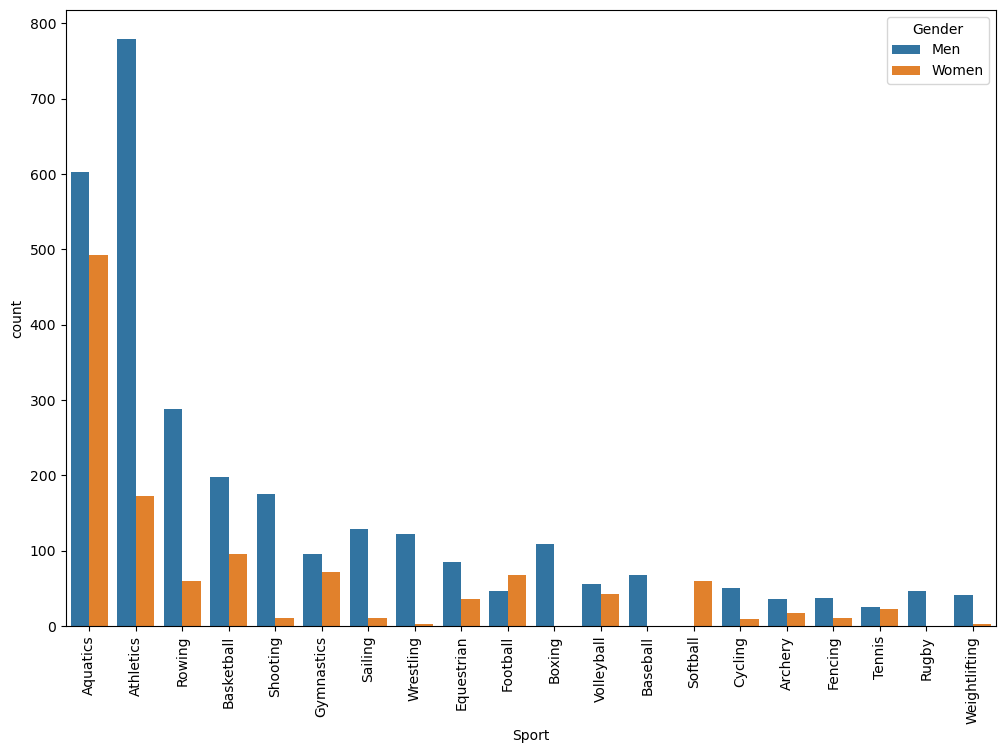

In [61]:
# Check the difference in performace by Gender
plt.figure(figsize=(12,8))
sns.countplot(data=df_usa_top20, x="Sport", hue="Gender", order=usa_top20.index)
plt.xticks(rotation=90)
plt.show()

# Do men perform better than women?

So far the analysis shows that men tend to win more medals than women.

Can we conclude that men perform better than women at the Olympics?

In [53]:
# Get total medals by gender
menvwomen = df_usa_top20.Gender.value_counts()
menvwomen

Gender
Men      2988
Women    1184
Name: count, dtype: int64

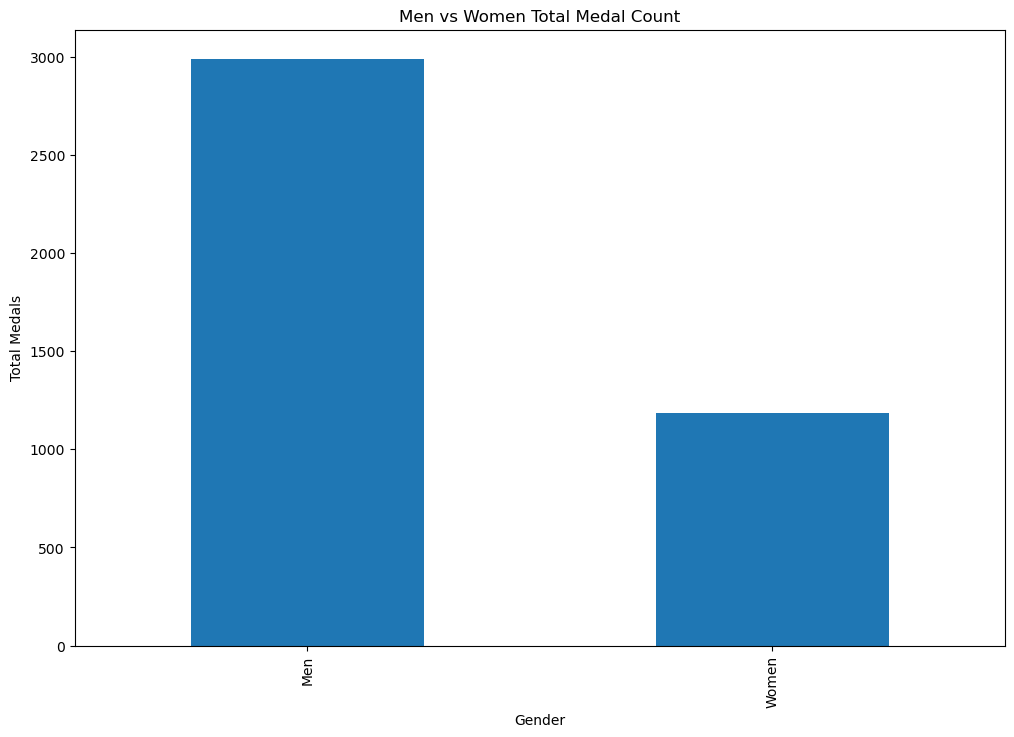

In [62]:
plt.figure(figsize=(12,8))
menvwomen.plot(kind="bar")
plt.title("Men vs Women Total Medal Count")
plt.ylabel("Total Medals")
plt.show()

In [31]:
# Find the totals for each Medal category
gender_medals = df_usa_top20.groupby(["Medal","Gender"])["Gender"].count().unstack()
gender_medals

Gender,Men,Women
Medal,,
Bronze,726,263
Gold,1492,567
Silver,770,354


In [56]:
# Melt the datafarme so I can make a seaborn graph
gender_medals_melted = pd.melt(gender_medals, id_vars="Medal", value_vars=["Men", "Women"], value_name="Total")
gender_medals_melted

,Medal,Gender,Total
0,Bronze,Men,726
1,Gold,Men,1492
2,Silver,Men,770
3,Bronze,Women,263
4,Gold,Women,567
5,Silver,Women,354


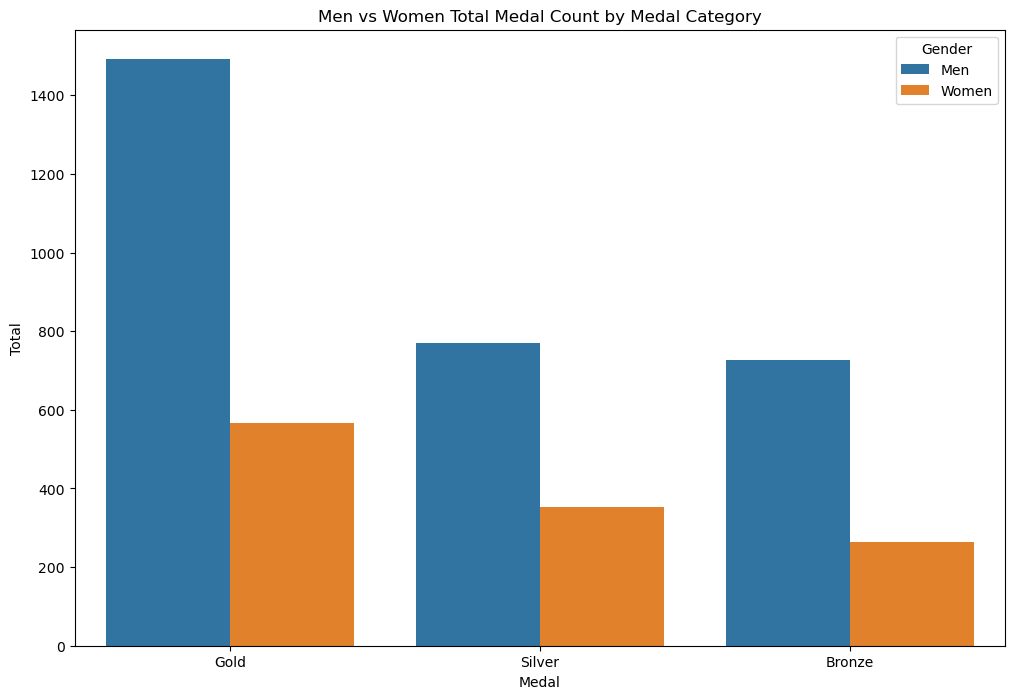

In [63]:
# show men vs women medal count by Medal category
plt.figure(figsize=(12,8))
sns.barplot(data=gender_medals_melted, x = "Medal", y = "Total", hue = "Gender", order=["Gold", "Silver", "Bronze"])
plt.title("Men vs Women Total Medal Count by Medal Category")
plt.show()

Again the analysis shows men collect more medals than women but is this a fair analysis?

This dataset only includes information for medal winners, not overall participants.

The initial analysis indicates that men collect more medals than women. However, this comparison may not be entirely fair due to potential differences in the number of male and female participants. Without data on the total number of participants, it’s challenging to accurately assess performance based solely on medal counts.

To gain a better insight into performance, we can compare the percentage of Gold, Silver, and Bronze medals won by men and women. This approach, while not perfect, allows us to see the distribution of medals between genders among the winners.

In [32]:
# Find the percentages. 2988 male medal winners
gender_medals["men_%"] = gender_medals["Men"] / 2988

In [33]:
# 1184 female medal winners
gender_medals["women_%"] = gender_medals["Women"] / 1184

In [40]:
gender_medals.reset_index(inplace = True)

In [44]:
# Melt the dataframe to make a seaborn graph
gender_melted = pd.melt(gender_medals, id_vars=["Medal"], value_vars=["men_%", "women_%"], var_name="Gender", value_name = "percentage")
gender_melted

,Medal,Gender,percentage
0,Bronze,men_%,0.242972
1,Gold,men_%,0.499331
2,Silver,men_%,0.257697
3,Bronze,women_%,0.222128
4,Gold,women_%,0.478885
5,Silver,women_%,0.298986


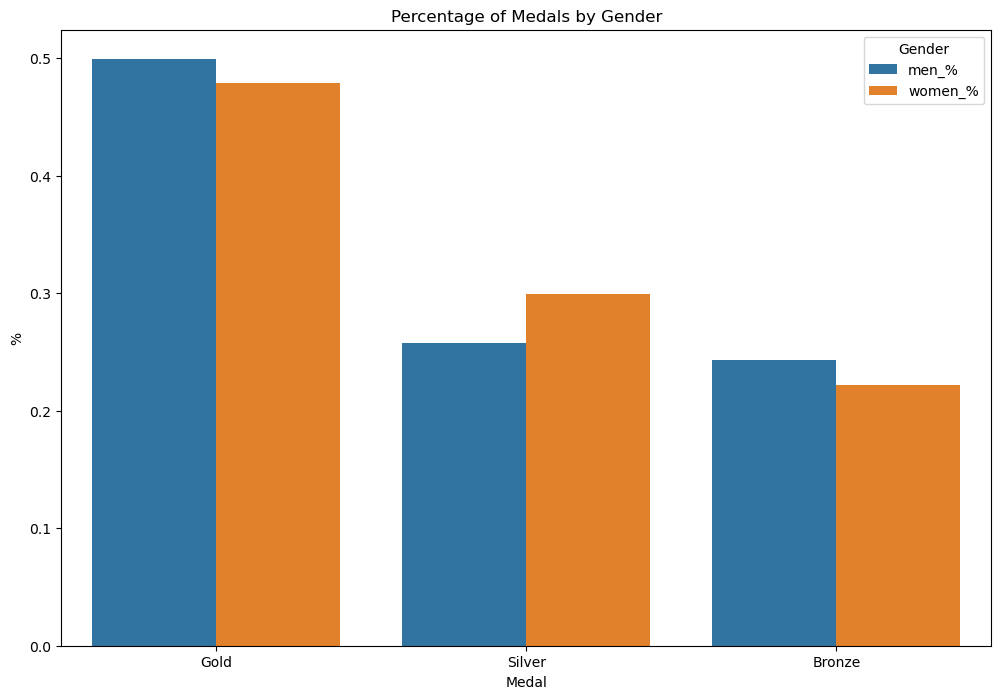

In [48]:
plt.figure(figsize=(12,8))
sns.barplot(data=gender_melted, x="Medal", y ="percentage", hue="Gender", order=["Gold", "Silver", "Bronze"])
plt.title("Percentage of Medals by Gender")
plt.ylabel("%")
plt.show()

Summary:

The initial analysis indicated that men collect more medals than women. However, this may not be a fair comparison due to potential differences in the number of male and female participants. Without data on the total number of participants, it's challenging to fully assess performance based solely on medal counts.

To provide a more balanced perspective, we compared the percentage of Gold, Silver, and Bronze medals won by men and women. This approach, although not perfect, allows us to see the distribution of medals between genders among the winners.

The following bar chart visualizes these percentages:

    1. Gold Medals: Men won approximately 49.9% of their medals as Gold, while women won 47.9% as Gold.
    2. Silver Medals: Men won approximately 25.8% of their medals as Silver, while women won 29.9% as Silver.
    3.Bronze Medals: Men won approximately 24.3% of their medals as Bronze, while women won 22.2% as Bronze.

This visualization provides insight into the relative performance of men and women among medal winners, highlighting the distribution of different types of medals won by each gender.